# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



#### Project Background and Objective
* Background: In the present time, the banking industry is spending a significant amount of money on marketing. As a result, it is crucial for banks to enhance the efficiency of their marketing strategies. By gaining an understanding of the customers' requirements, banks can develop more effective marketing plans and create smarter product designs, which ultimately leads to greater customer satisfaction.

* Objective: The aim of this project is to enhance the efficiency of the bank's telemarketing campaign. This can be achieved by gaining a more detailed understanding of the bank's customer base, predicting the customers' reactions to the telemarketing campaign, and identifying a target customer profile that can be used for future marketing strategies.

* Through the examination of customer characteristics, such as demographic information and past transactions, the bank can anticipate the saving habits of its customers and pinpoint the group of customers who are more inclined to make term deposits. By targeting these customers, the bank can allocate its marketing resources more efficiently, resulting in a more effective deposit acquisition strategy. Additionally, this approach can lead to improved customer satisfaction as it reduces the frequency of irrelevant advertisements for certain customers.

### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Step 0: Import all the necessary libraries

In [1]:
## Basic libs
import pandas as pd
import numpy as np
import warnings

## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl

from sklearn.model_selection import train_test_split 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, label_binarize
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score, precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn import metrics

from sklearn.compose import make_column_transformer, make_column_selector, TransformedTargetRegressor, ColumnTransformer
from sklearn.compose import make_column_transformer
from scipy.stats import boxcox
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

#Random sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


from sklearn import set_config
set_config(display="diagram")
warnings.filterwarnings('ignore')

### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The Bank of Portugal is seeking to develop a model capable of forecasting which potential customers will sign up for their term deposit service. By implementing a successful predictive model, they aim to improve the efficiency of their marketing campaigns by targeting individuals who are more likely to subscribe to their service. This will enable them to allocate their resources more effectively. The dataset under consideration pertains to the direct phone marketing campaigns conducted by a Portuguese bank between May 2008 and November 2010, which were designed to encourage existing customers to opt for their term deposit service.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
df_bank = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df_bank.shape

(41188, 21)

##### Observation

* 1 - Mixed dataset (Numerical + Categorical)
* 2 - There are 21 features
* 3 - 41,188 observations in this dataset. Each represents an existing customer that the bank reached via phone calls.
* 4 - For each observation, the dataset records 20 input variables that stand for both qualitative and quantitative attributes of the customer.
* 5 - There is a single binary output variable that denotes “yes” or “no” revealing the outcomes of the phone calls.

In [5]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


###### Distribution plot

<AxesSubplot:xlabel='previous', ylabel='Density'>

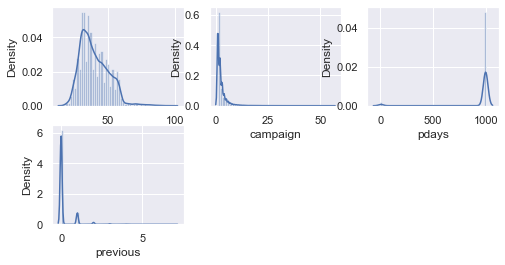

In [103]:
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
subplot(2,3,1)
sns.distplot(df_bank['age'])
subplot(2,3,2)
sns.distplot(df_bank['campaign'])
subplot(2,3,3)
sns.distplot(df_bank['pdays'])
subplot(2,3,4)
sns.distplot(df_bank['previous'])


###### Class distribution

no     0.887346
yes    0.112654
Name: y, dtype: float64


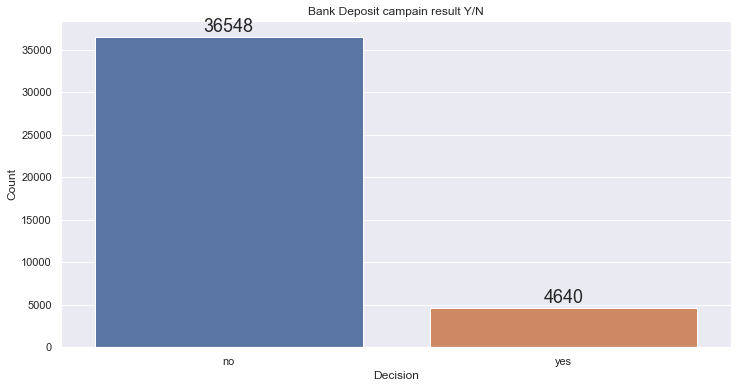

In [87]:
fig, ax = plt.subplots(figsize=(12, 6))
print(df_bank.y.value_counts(normalize=True))
ax = sns.countplot(x='y', data=df_bank)

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# giving title to the plot
plt.title('Bank Deposit campain result Y/N');
plt.xlabel('Decision')
plt.ylabel('Count')
#plt.xticks(rotation=45)

plt.savefig("./images/yes_no_ratio.jpg");
plt.show()


We have imbalanced data here which refers to a situation where one class (no) in our dataset has many more samples than other classes (yes), in the ration of 9:1. This can cause issues in our models as it may end up being biased towards the majority class (no), leading to poor performance on the minority class (yes). To address this issue, I will use one of the several strategies that can be employed, such as ***oversampling the minority class or undersampling the majority class.***

balance yes/no

Results show the model predict well for positive 90% but bad for Neutral and 40% for negative before reblance the training data for negative and positive.

##### Obeservation

* 1 - Bank deposit product subscribed by 4640 people out of 41188
* 2 - Bank deposit product not subscribed by 36548 people out of 41188
* 3 - Not subscibed count is greater than the subcription so this dataset is imbalanced data

In [10]:
df_bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [11]:
numerical_columns = df_bank.select_dtypes(include=['int', 'float']).columns.tolist()
print(numerical_columns)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [12]:
non_numerical_columns = df_bank.select_dtypes(include=['object']).columns.tolist()
print(non_numerical_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


##### Observation

* Numerical data : age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
* Categorical data : job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y

In [13]:
df_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

##### Observation

* There is no missing value in the given dataset

##### Heatmap for Correlation

Correlation between variables in a dataset can lead to several problems in the performance of classification algorithms, which are designed to identify patterns and relationships between variables to predict the class label of a new observation.

One of the main issues with correlated data is that it can lead to overfitting, where the algorithm learns the noise in the data rather than the underlying pattern.

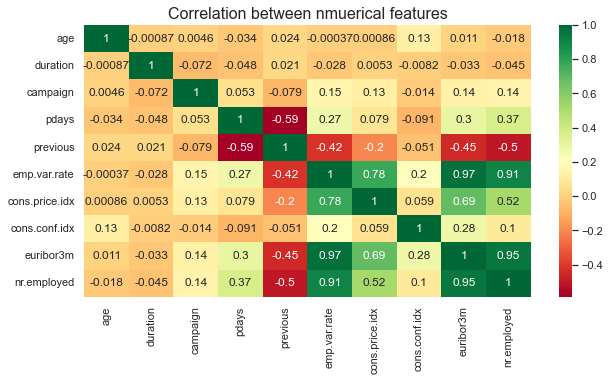

In [14]:
# Plotting a heat map

plt.figure(figsize=(10,5))
bank_corr= df_bank.corr()
sns.heatmap(bank_corr,cmap="RdYlGn",annot=True)
plt.title('Correlation between nmuerical features',fontdict={'fontsize': 16});
plt.savefig("./images/correlation.jpg");

##### Observation

* There is strong positive correlation between emp.var.rate and nr.employed,euribor3m,cons.price.idx
* There is negative correlation between previous and pdays.

Correlated data can also impact the stability and interpretability of the classification algorithm. In some cases, it can be difficult to interpret the relationship between features and the predicted class label, as the effect of each feature on the prediction may be confounded by the presence of other correlated features.

To mitigate the impact of correlated data in classification algorithms, it is often recommended to perform feature selection or feature extraction techniques to reduce the dimensionality of the dataset and remove redundant or highly correlated features. Additionally, regularization techniques can be applied to penalize the inclusion of correlated features in the model and improve its generalization performance.

We will use PCA in this assignment.

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [15]:
#Drop column "contact" which in my opnion get less impact on predicting the outcome
df_bank = df_bank.drop('contact', axis=1)

Duration, Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [16]:
df_bank = df_bank.drop('duration', axis=1)

In [17]:
df_categorical_features = df_bank.select_dtypes(exclude=np.number).columns.tolist()
df_categorical_features 

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [18]:
df_numerical_features = df_bank.select_dtypes(include=np.number).columns.tolist()
df_numerical_features 

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

Unique values of each of the categorical features.

In [19]:
print(df_bank['job'].unique())
print(df_bank['marital'].unique())
print(df_bank['education'].unique())
print(df_bank['default'].unique())
print(df_bank['housing'].unique())
print(df_bank['loan'].unique())
print(df_bank['month'].unique())
print(df_bank['day_of_week'].unique())
print(df_bank['poutcome'].unique())
print(df_bank['y'].unique())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
['nonexistent' 'failure' 'success']
['no' 'yes']


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

Objective: Increase the effectiveness of the bank's telemarketing campaign. This project will enable the bank to develop a more granular understanding of its customer base, predict customers' response to its telemarketing campaign and establish a target customer profile for future marketing plans.
The goal is to examine the peformance of multiple classifier methods and find the one that returns the best metrics.

The negative impact of missing sales opportunities is more significant than having false alarms. Hence, the objective is to maximize the recall score. Because the majority of the feature space is of the "no sale" class (class 0) due to the large class imbalance, the accuracy score is not the most appropriate metric to use. Therefore, the focus is on optimizing for the maximum f1-score, which is a combination of recall and precision. However, the priority is on selecting methods that optimize for recall.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [22]:
X = df_bank.drop('y', axis = 1)
y = df_bank['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [23]:
#### create column transformer to implement standard scaler, oneHotEncoder and OrdinalEncoder

column_transformer = make_column_transformer(
    #(StandardScaler(), ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx', \
    (StandardScaler(), ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx', \
                        'cons.conf.idx','euribor3m','nr.employed']),
    (OneHotEncoder(handle_unknown='ignore'), ['default','housing','loan','poutcome']), 
    (OrdinalEncoder(categories=[['housemaid','services','admin.','blue-collar','technician','retired','management',\
                                 'unemployed','self-employed', \
                                 'unknown','entrepreneur','student'],['married','single','divorced','unknown'], \
                                ['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course','unknown', \
                                 'university.degree', 'illiterate'],['mon','tue','wed','thu','fri'], \
                                ['may','jun','jul','aug','oct','nov','dec','mar','apr','sep']]),\
     ['job','marital','education','day_of_week','month']),
    remainder='passthrough', verbose_feature_names_out=False )   

In [24]:
column_transformer.fit_transform(X)

array([[ 1.53303429, -0.56592197,  0.1954139 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.62899323, -0.56592197,  0.1954139 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.29018564, -0.56592197,  0.1954139 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.53303429, -0.20490853,  0.1954139 , ...,  6.        ,
         4.        ,  5.        ],
       [ 0.38152696, -0.56592197,  0.1954139 , ...,  4.        ,
         4.        ,  5.        ],
       [ 3.26029527,  0.15610492,  0.1954139 , ...,  4.        ,
         4.        ,  5.        ]])

In [25]:
X_transformed = column_transformer.transform(X)

transformed_df = pd.DataFrame(X_transformed, columns=column_transformer.get_feature_names_out())

In [26]:
transformed_df

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_no,...,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success,job,marital,education,day_of_week,month
0,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.628993,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.290186,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.002309,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,1.0,...,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0
4,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1.0,...,0.0,0.0,0.0,1.0,0.0,5.0,0.0,4.0,4.0,5.0
41184,0.573445,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1.0,...,0.0,0.0,0.0,1.0,0.0,3.0,0.0,4.0,4.0,5.0
41185,1.533034,-0.204909,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1.0,...,0.0,0.0,0.0,1.0,0.0,5.0,0.0,6.0,4.0,5.0
41186,0.381527,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1.0,...,0.0,0.0,0.0,1.0,0.0,4.0,0.0,4.0,4.0,5.0


In [27]:
X = transformed_df.copy()

#### Principal Component Analysis - dimnetionality reduction

In [28]:
pca = PCA()
pca.fit(X)
#
print("n_components= " + str(pca.n_components_) )

n_components= 26


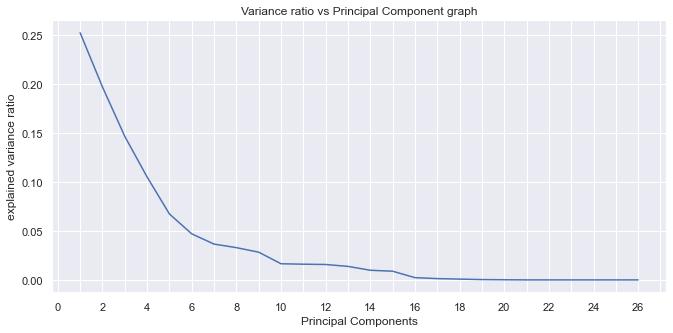

In [83]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
# print( pca.explained_variance_ratio_.shape )
x = np.arange(1,27,1)

fig, ax = plt.subplots(figsize=(11, 5))
ax.plot( x, pca.explained_variance_ratio_ )
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.set_xlabel("Principal Components")
ax.set_ylabel("explained variance ratio")
ax.set_title("Variance ratio vs Principal Component graph")
ax.grid(visible=True, which='both')
plt.savefig("./images/pca.jpg");
plt.show()


The variance ratio vs principal component graph is a useful tool for determining how many principal components to retain in a dimensionality reduction technique we use here.

From the above graph we choose to retain **17** principal components, as all together explain almost 100% of the variance.

### Problem 6: Train/Test Split

Allocate a large portion of the data, 70%, to the training set, and the remaining portion, such as 30%, to the testing set.

In [30]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (28831, 26)
Shape of testing feature: (12357, 26)
Shape of training label: (28831,)
Shape of training label: (12357,)


In machine learning and specifically in the evaluation of binary classifiers, the AUC (Area Under the Curve) refers to the area under the Receiver Operating Characteristic (ROC) curve. The ROC curve is a plot of the True Positive Rate (TPR) against the False Positive Rate (FPR) for a binary classifier. The TPR and FPR are calculated at different threshold values for the classifier's output. The AUC gives a single scalar metric that summarizes the classifier's performance over all possible threshold values.

AUC ranges from 0 to 1, with a value of 1 indicating a perfect classifier and a value of **0.5 indicating a classifier that is no better than random.** In practice, AUC is often used as a performance metric for binary classifiers, as it gives a good overall picture of the classifier's performance, taking into account both the true positive rate and the false positive rate.

The following **evaluate_model** fuctions takes in the train and test data and gives all the performance parameter of a given model includes AUC.

In [31]:
# function to evaluate and calculate accuracy, precision, recall and F1-score 
def evaluate_model(model, x_test, y_test):
    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall and f1-score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,
            'fpr': fpr, 'tpr': tpr, 'auc': auc}

Compare performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines

# Problem 7: A Baseline Models

A baseline model is a simple and straightforward model used as a benchmark or reference point in machine learning. It provides a minimum standard of performance that can be used to compare other more complex models. The idea behind using a baseline model is to have a model that is not too complex, and serves as a starting point for improving the performance of the model. This helps in identifying the impact of different techniques and algorithms in improving the accuracy and performance of the model.

In [32]:
train, test = train_test_split(df_bank, test_size=0.3, random_state=42)

In [33]:
# Compute the majority class in the training set
majority_class = train["y"].mode()[0]

In [34]:
# Predict the majority class for all instances in the testing set
baseline_predictions = [majority_class] * len(test)

In [35]:
# Compute the accuracy of the baseline model
baseline_accuracy = accuracy_score(test["y"], baseline_predictions)

print("Baseline accuracy:", baseline_accuracy)

Baseline accuracy: 0.8875940762320952


###### The baseline model shows 88.8% accuray of predicting the majority class "no", highly biased.

### Problem 8: A Simple Model

Use the following models with default parameters
- K Nearest Neighbor.
- Logistic Regression.
- Decision Trees.
- Support Vector Machines.

Comparision table will be shown at the end.

In [36]:
simple_model_comparision = list()

#####  8.1 - K-Nearest Neighbors (KNN) 
classify new data by finding k-number of closest neighbor from the training data and then decide the class based on the majority of it's neighbors. 

In [37]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
knn_eval = evaluate_model(knn_model, X_test, y_test)
simple_model_comparision.clear()
simple_model_comparision.append(['KNN',knn_eval['acc'], knn_eval['prec'],knn_eval['rec'],knn_eval['f1'],knn_eval['auc']])

#####  8.2 - Logistic Regression
In logistic regression, applying linear regression but applying a sigmoid function for the outcome.

In [39]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [40]:
lr_eval = evaluate_model(lr_model, X_test, y_test)
simple_model_comparision.append(['Logistic Regression',lr_eval['acc'], lr_eval['prec'],lr_eval['rec'],lr_eval['f1'],lr_eval['auc']])

#####  8.3 - Decision Tree
A decision tree is a diagram in the shape of a tree that is used to choose a way to proceed. Each branch of the tree indicates a possible decision, occurrence, or response.

In [41]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
dt_eval = evaluate_model(dt_model, X_test, y_test)
simple_model_comparision.append(['Decision Tree Classifier',dt_eval['acc'], dt_eval['prec'],dt_eval['rec'],lr_eval['f1'],dt_eval['auc']])

#####  8.4 - Support Vector Machine
The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes

In [43]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [44]:
svm_eval = evaluate_model(svm_model, X_test, y_test)
simple_model_comparision.append(['SVM',svm_eval['acc'], svm_eval['prec'],svm_eval['rec'],svm_eval['f1'],svm_eval['auc']])

### Problem 9: Score the Model
What is the accuracy of your model?

Classifier Metrics in Context
The performance of a model can be evaluated using a variety of metrics. It is critical that you understand what each metric calculates to choose the best evaluation metric for your model. For example, models may be hailed as highly accurate, but depending on the question the model is trying to address, another metric may be more appropriate. The metrics that are typically used to determine the performance of a model are accuracy, precision, recall, and F1. As these measures are often confused and interchanged, this mini-lesson will clarify the differences.

**Accuracy**
Accuracy is the most intuitive measure of performance, as it is simply the ratio of correctly predicted observations to total observations. Accuracy can be deceiving in that it may signal a highly accurate model, but in all actuality, it has some weaknesses. Accuracy is only useful when the dataset is perfectly symmetrical, where values of false negatives and false positives are almost identical with similar costs.

**Precision**
Precision is the proportion of accurately predicted positive observations in relation to the total predicted positive observations. High precision is directly correlated to a low false-positive rate.

**Recall**
Recall (a.k.a. sensitivity) is the proportion of correctly predicted positive observations in relation to all of the observations in an actual class. As a result, recall measures the precision with which our model can determine the relevant data.

**F1**
F1 is the weighted average of both precision and recall.


###### Simple models comparision table with default parameters

In [45]:
simple_model_comparision = pd.DataFrame(simple_model_comparision, columns = ['Model','Accuracy','Precision','Recall', 'F1','AUC']).set_index("Model")
simple_model_comparision

,Accuracy,Precision,Recall,F1,AUC
Model,,,,,
KNN,0.888889,0.510638,0.276458,0.358711,0.719574
Logistic Regression,0.898438,0.656542,0.202304,0.309301,0.766108
Decision Tree Classifier,0.834264,0.290261,0.328294,0.309301,0.616511
SVM,0.899166,0.677419,0.196544,0.304688,0.670446


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

#####  10.1 - Confusion Matrix: Imbalaced data on simple models with default parameters

In [104]:
y_predicted_knn = knn_model.predict(X_test)
y_predicted_lgr = lr_model.predict(X_test)
y_predicted_dTree = dt_model.predict(X_test)
y_predicted_svn = svm_model.predict(X_test)

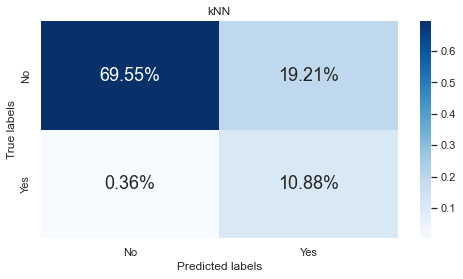

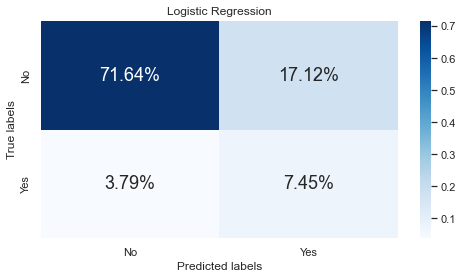

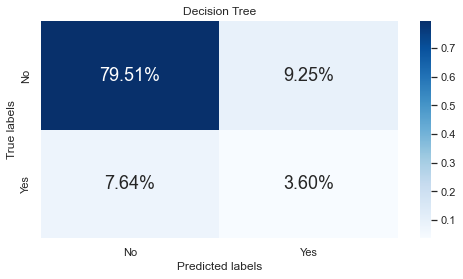

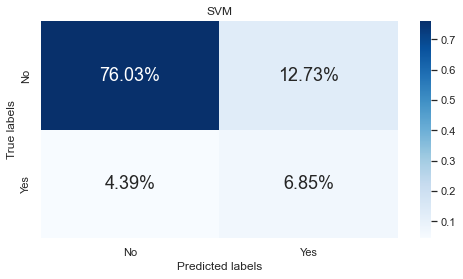

<Figure size 576x288 with 0 Axes>

In [105]:
predictedList = [y_predicted_knn, y_predicted_lgr, y_predicted_dTree, y_predicted_svn]
listModels = ['kNN','Logistic Regression','Decision Tree','SVM']

plt.rcParams.update({'font.size': 18})

for i,j in enumerate(predictedList):
   
    ax = plt.axes()
        
    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, j)

    # Visualization of Confusion matrix
    pl.title('Confusion matrix of the classifier')
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues',ax=ax)
    ax.set_title(listModels[i])
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    
    ax.xaxis.set_ticklabels(['No', 'Yes']); 
    ax.yaxis.set_ticklabels(['No', 'Yes']);
    
    ConfusionMatrixDisplay(cm, display_labels = ['No','Yes'])

    plt.show()
plt.savefig("./images/ConfusionMatrix_baseline_default.jpg");
plt.show()

#### The confusino matrics shows all the models have high accuracy/bias to the majority class which is "no"

There is an impalance on the lables as explained above.

<AxesSubplot:ylabel='y'>

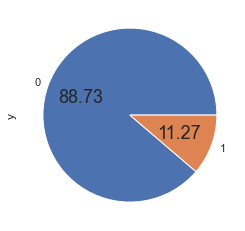

In [48]:
y.value_counts().plot.pie(autopct='%.2f')

I will use Random sampling which helps reduce bias in the data towards "no" by ensuring that each data point has an equal chance of being selected for the training set, inother words equal number of "yes" and "no". This is important because biased training data can lead to biased models that perform poorly on new data.

###### 10.2  Random Undersampling
'not minority' = resample all classes but the minority class

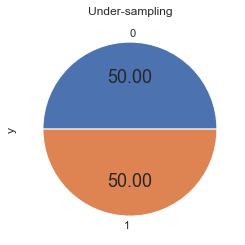

In [49]:
rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
X_rus, y_rus = rus.fit_resample(X, y)

ax = y_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [50]:
model_comparision_rus = list()

In [51]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42)

# Show the Training and Testing Data
print('Shape of training feature:', X_train_rus.shape)
print('Shape of testing feature:', X_test_rus.shape)
print('Shape of training label:', y_train_rus.shape)
print('Shape of testing label:', y_test_rus.shape)

Shape of training feature: (6496, 26)
Shape of testing feature: (2784, 26)
Shape of training label: (6496,)
Shape of testing label: (2784,)


In [52]:
knn_model.fit(X_train_rus, y_train_rus)
knn_eval_rus = evaluate_model(knn_model, X_test_rus, y_test_rus)
model_comparision_rus.clear()
model_comparision_rus.append(['KNN',knn_eval_rus['acc'], knn_eval_rus['prec'],knn_eval_rus['rec'],knn_eval_rus['f1'],knn_eval_rus['auc']])

In [53]:
#Logistic Regression
lr_model.fit(X_train_rus, y_train_rus)
lr_eval_rus = evaluate_model(lr_model, X_test_rus, y_test_rus)
model_comparision_rus.append(['Logistic Regression',lr_eval_rus['acc'], lr_eval_rus['prec'],lr_eval_rus['rec'],lr_eval_rus['f1'],lr_eval_rus['auc']])

In [54]:
#Decision Tree Classifier
dt_model.fit(X_train_rus, y_train_rus)
dt_eval_rus = evaluate_model(dt_model, X_test_rus, y_test_rus)
model_comparision_rus.append(['Decision Tree Classifier',dt_eval_rus['acc'], dt_eval_rus['prec'],dt_eval_rus['rec'],lr_eval_rus['f1'],dt_eval_rus['auc']])

In [55]:
svm_model.fit(X_train_rus, y_train_rus)
dt_eval = evaluate_model(dt_model, X_test_rus, y_test_rus)
model_comparision_rus.append(['Decision Tree Classifier',dt_eval_rus['acc'], dt_eval_rus['prec'],dt_eval_rus['rec'],lr_eval_rus['f1'],dt_eval_rus['auc']])

In [56]:
model_comparision_rus = pd.DataFrame(model_comparision_rus, columns = ['Model','Accuracy','Precision','Recall', 'F1','AUC']).set_index("Model")
model_comparision_rus

,Accuracy,Precision,Recall,F1,AUC
Model,,,,,
KNN,0.699713,0.712413,0.666186,0.688525,0.736048
Logistic Regression,0.733118,0.777586,0.650324,0.708284,0.765946
Decision Tree Classifier,0.647629,0.647101,0.643836,0.708284,0.647642
Decision Tree Classifier,0.647629,0.647101,0.643836,0.708284,0.647642


In [57]:
y_predicted_knn = knn_model.predict(X_test_rus)
y_predicted_lgr = lr_model.predict(X_test_rus)
y_predicted_dTree = dt_model.predict(X_test_rus)
y_predicted_svn = svm_model.predict(X_test_rus)

#####  10.3 - Confusion Matrix: balaced data with Random Under Sampling (RUS) on simple models with default parameters

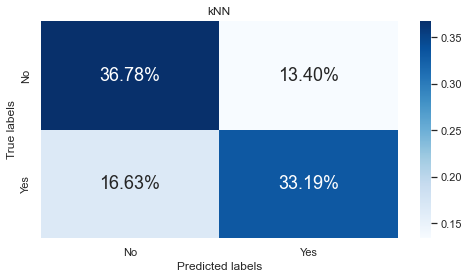

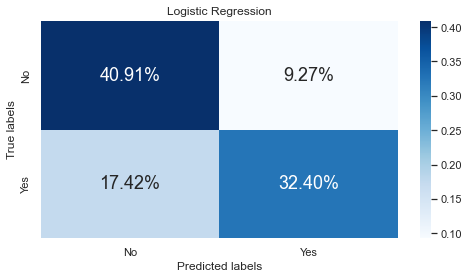

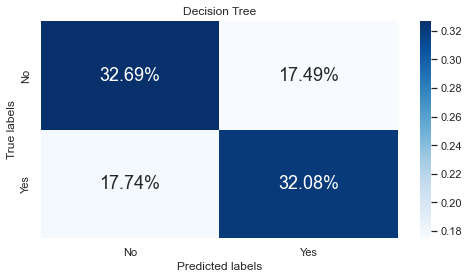

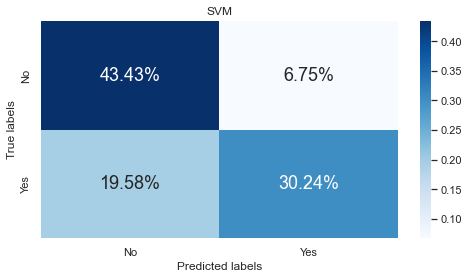

<Figure size 576x288 with 0 Axes>

In [58]:
predictedList = [y_predicted_knn, y_predicted_lgr, y_predicted_dTree, y_predicted_svn]
listModels = ['kNN','Logistic Regression','Decision Tree','SVM']

#fix, ax = plt.subplots(2,2, figsize = (18,18))
plt.rcParams.update({'font.size': 18})

predictedList = [y_predicted_knn, y_predicted_lgr, y_predicted_dTree, y_predicted_svn]

for i,j in enumerate(predictedList):
   
    ax = plt.axes()
        
    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test_rus, j)

    # Visualization of Confusion matrix
    pl.title('Confusion matrix of the classifier')
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues',ax=ax)
    ax.set_title(listModels[i])
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    
    ax.xaxis.set_ticklabels(['No', 'Yes']); 
    ax.yaxis.set_ticklabels(['No', 'Yes']);
    
    ConfusionMatrixDisplay(cm, display_labels = ['No','Yes'])

    plt.show()
plt.savefig("./ConfusionMatrix_baseline_rus.jpg");

##### 10.4 Random Oversampling
"not majority" = resample all classes but the majority class

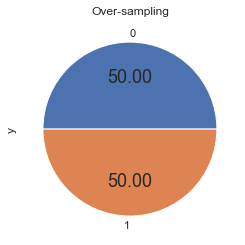

In [59]:
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_ros, y_ros = ros.fit_resample(X, y)

ax = y_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [110]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=42)

# Show the Training and Testing Data
print('Shape of training feature:', X_train_ros.shape)
print('Shape of testing feature:', X_test_ros.shape)
print('Shape of training label:', y_train_ros.shape)
print('Shape of testing label:', y_test_ros.shape)

Shape of training feature: (51167, 26)
Shape of testing feature: (21929, 26)
Shape of training label: (51167,)
Shape of testing label: (21929,)


In [111]:
model_comparision_ros = list()

In [112]:
#KNN
knn_model.fit(X_train_ros, y_train_ros)
knn_eval_ros = evaluate_model(knn_model, X_test_ros, y_test_ros)
model_comparision_ros.clear()
model_comparision_ros.append(['KNN',knn_eval_ros['acc'], knn_eval_ros['prec'],knn_eval_ros['rec'],knn_eval_ros['f1'],knn_eval_ros['auc']])

In [113]:
#Logistic Regression
lr_model.fit(X_train_ros, y_train_ros)
lr_eval_ros = evaluate_model(lr_model, X_test_ros, y_test_ros)
model_comparision_ros.append(['Logistic Regression',lr_eval_ros['acc'], lr_eval_ros['prec'],lr_eval_ros['rec'],lr_eval_ros['f1'],lr_eval_ros['auc']])

In [114]:
#Decision Tree Classifier
dt_model.fit(X_train_ros, y_train_ros)
dt_eval_ros = evaluate_model(dt_model, X_test_ros, y_test_ros)
model_comparision_ros.append(['Decision Tree Classifier',dt_eval_ros['acc'], dt_eval_ros['prec'],dt_eval_ros['rec'],dt_eval_ros['f1'],dt_eval_ros['auc']])

In [115]:
# #SVM Classifier - takes forever
svm_model.fit(X_train_ros, y_train_ros)
svm_eval_ros = evaluate_model(svm_model, X_test_ros, y_test_ros)
model_comparision_ros.append(['SVM',svm_eval_ros['acc'], svm_eval_ros['prec'],svm_eval_ros['rec'],svm_eval_ros['f1'],svm_eval_ros['auc']])

In [116]:
model_comparision_ros = pd.DataFrame(model_comparision_ros, columns = ['Model','Accuracy','Precision','Recall', 'F1','AUC']).set_index("Model")
model_comparision_ros

,Accuracy,Precision,Recall,F1,AUC
Model,,,,,
KNN,0.856719,0.790720,0.968784,0.870742,0.926177
Logistic Regression,0.730038,0.766397,0.658916,0.708604,0.767348
Decision Tree Classifier,0.936066,0.887704,0.997895,0.939579,0.938287
SVM,0.742122,0.819217,0.618912,0.705116,0.798550


#####  10.5 - Confusion Matrix: balanced data with Random Over Sampling (ROS) on simple models with default parameters

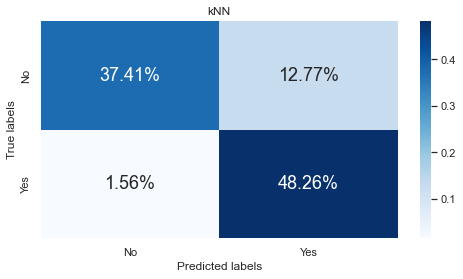

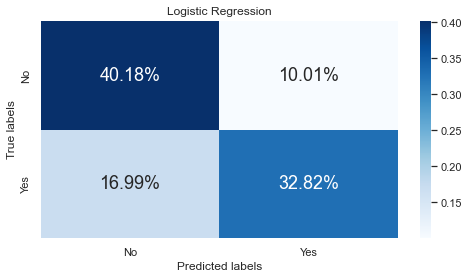

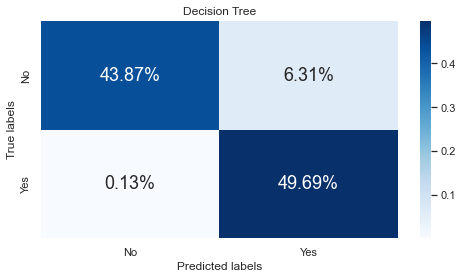

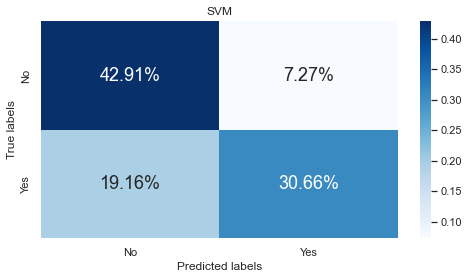

<Figure size 576x288 with 0 Axes>

In [89]:
y_predicted_knn = knn_model.predict(X_test_ros)
y_predicted_lgr = lr_model.predict(X_test_ros)
y_predicted_dTree = dt_model.predict(X_test_ros)
y_predicted_svn = svm_model.predict(X_test_ros)

predictedList = [y_predicted_knn, y_predicted_lgr, y_predicted_dTree, y_predicted_svn]
listModels = ['kNN','Logistic Regression','Decision Tree','SVM']

plt.rcParams.update({'font.size': 18})

for i,j in enumerate(predictedList):
   
    ax = plt.axes()
        
    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test_ros, j)

    # Visualization of Confusion matrix
    pl.title('Confusion matrix of the classifier')
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues',ax=ax)
    ax.set_title(listModels[i])
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    
    ax.xaxis.set_ticklabels(['No', 'Yes']); 
    ax.yaxis.set_ticklabels(['No', 'Yes']);
    
    ConfusionMatrixDisplay(cm, display_labels = ['No','Yes'])

    plt.show()
plt.savefig("./ConfusionMatrix_baseline_ros.jpg");

The following tables show the performance of the four baseline models with default class ratio, underbalanced and over balanced respectively

- Performance of simple models with default parameters

In [66]:
simple_model_comparision

,Accuracy,Precision,Recall,F1,AUC
Model,,,,,
KNN,0.888889,0.510638,0.276458,0.358711,0.719574
Logistic Regression,0.898438,0.656542,0.202304,0.309301,0.766108
Decision Tree Classifier,0.834264,0.290261,0.328294,0.309301,0.616511
SVM,0.899166,0.677419,0.196544,0.304688,0.670446


- Performance of simple models with default parameters using Random Under Sampling rebalance

In [67]:
model_comparision_rus

,Accuracy,Precision,Recall,F1,AUC
Model,,,,,
KNN,0.699713,0.712413,0.666186,0.688525,0.736048
Logistic Regression,0.733118,0.777586,0.650324,0.708284,0.765946
Decision Tree Classifier,0.647629,0.647101,0.643836,0.708284,0.647642
Decision Tree Classifier,0.647629,0.647101,0.643836,0.708284,0.647642


- Performance of simple models with default parameters using Random over Sampling rebalance

In [117]:
model_comparision_ros

,Accuracy,Precision,Recall,F1,AUC
Model,,,,,
KNN,0.856719,0.790720,0.968784,0.870742,0.926177
Logistic Regression,0.730038,0.766397,0.658916,0.708604,0.767348
Decision Tree Classifier,0.936066,0.887704,0.997895,0.939579,0.938287
SVM,0.742122,0.819217,0.618912,0.705116,0.798550


A high recall value means that the model has a low number of false negatives, i.e., it correctly identifies most of the positive instances. On the other hand, a low recall value means that the model has a high number of false negatives, i.e., it misses many positive instances. 
Recall is particularly important in our applications where the cost of missing a positive instance is high, such as missing a potentian new bank customer.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

To achieve higher accuracy and performance compared to the simple models I will use advanced models serves as a comparison point to assess the impact of the additional complexity in achieving better results that can be achieved through fine tuning the hyperparameters.

In [72]:
model_comparisions = list()

##### 11.1 Hyperparameter grid search

In [73]:
#use this function to get the performance of the classification models with grid search
def model_performance(model,param,X_train,y_train, X_test, y_test):

    # Perform grid search using 5-fold cross-validation
   
    grid_search_model = GridSearchCV(model, param, cv=5)
    grid_search_model.fit(X_train, y_train)

    # Evaluate the best model on the test set
    best_model = grid_search_model.best_estimator_
    score= best_model.score(X_test, y_test)
    #fit time
    fit_time= grid_search_model.cv_results_['mean_fit_time'].sum()

    # Predict Test Data 
    y_pred = best_model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = best_model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    return {'model': model,'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'fit_time': fit_time, 'best_model': best_model}

In [78]:
#parametere and coresponding model list

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}


svm_param_grid = {
      
    #'C': [0.1, 1, 10],
    #'kernel': ['linear', 'rbf']
   }

lr_param_grid = {
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}


dt_param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

#model_list
model_svm = SVC(probability=True)
model_knn = KNeighborsClassifier()
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier()

param_list = [knn_param_grid, lr_param_grid, dt_param_grid, svm_param_grid]
models_list = [model_knn,model_lr,model_dt ,model_svm]

###### 11.2 Complex model comparision with imbalanced data

In [79]:
model_comparisions = []
for i,j in enumerate(param_list):
    result = model_performance(models_list[i],j,X_train,y_train, X_test, y_test)
    model_comparisions.append([result['model'],result['acc'], result['prec'],result['rec'],result['f1'],result['auc'],result['fit_time'],result['best_model']])
       

In [81]:
model_comparisions_df= pd.DataFrame(model_comparisions, columns = ['Model','Accuracy','Precesion','Recall','f1','AUC','Fit Time', 'Best Model']).set_index("Best Model")
model_comparisions_df = model_comparisions_df.loc[:,model_comparisions_df.columns != 'Model']
model_comparisions_df

,Accuracy,Precesion,Recall,f1,AUC,Fit Time
Best Model,,,,,,
"KNeighborsClassifier(n_neighbors=11, p=1)",0.894068,0.564103,0.253420,0.349727,0.749656,0.292876
"LogisticRegression(C=0.01, penalty='l1', solver='liblinear')",0.899490,0.682382,0.197984,0.306920,0.761768,14.077227
DecisionTreeClassifier(max_depth=3),0.899005,0.690027,0.184305,0.290909,0.747538,4.223295
SVC(probability=True),0.899166,0.677419,0.196544,0.304688,0.670446,163.982854


###### 11.3 Complex model comparision with data balanced with RUS (Random Under Sampling)

In [90]:
model_comparisions_rus = []
for i,j in enumerate(param_list):
    result_rus = model_performance(models_list[i],j,X_train_rus,y_train_rus, X_test_rus,y_test_rus)
    model_comparisions_rus.append([result_rus['model'],result_rus['acc'], result_rus['prec'],result_rus['rec'],result_rus['f1'],result_rus['auc'],result_rus['fit_time'], result_rus['best_model']])
     

In [91]:
model_comparisions_rus_df= pd.DataFrame(model_comparisions_rus, columns = ['Model','Accuracy','Precesion','Recall','f1','AUC','Fit Time', 'Best Model']).set_index("Best Model")
model_comparisions_rus_df = model_comparisions_rus_df.loc[:,model_comparisions_rus_df.columns != 'Model']
model_comparisions_rus_df

,Accuracy,Precesion,Recall,f1,AUC,Fit Time
Best Model,,,,,,
"KNeighborsClassifier(n_neighbors=11, p=1)",0.725216,0.764456,0.648161,0.701522,0.762937,0.115540
"LogisticRegression(C=1, penalty='l1', solver='liblinear')",0.733836,0.777491,0.652487,0.709526,0.765857,1.649412
"DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)",0.736351,0.837642,0.583994,0.688190,0.777387,1.137430
SVC(probability=True),0.736710,0.817476,0.607066,0.696731,0.768674,12.895143


###### 11.4 Complex model comparision with data balanced with ROS (Random Over Sampling)

In [118]:
model_comparisions_ros = []
for i,j in enumerate(param_list):
    result_ros = model_performance(models_list[i],j,X_train_ros,y_train_ros, X_test_ros,y_test_ros)
    model_comparisions_ros.append([result_ros['model'],result_ros['acc'], result_ros['prec'],result_ros['rec'],result_ros['f1'],result_ros['auc'],result_ros['fit_time'],result_ros['best_model']])
     

In [119]:
model_comparisions_ros_df= pd.DataFrame(model_comparisions_ros, columns = ['Model','Accuracy','Precesion','Recall','f1','AUC','Fit Time', 'Best Model']).set_index("Best Model")
model_comparisions_ros_df.loc[:,model_comparisions_ros_df.columns != 'Model']
model_comparisions_ros_df

,Model,Accuracy,Precesion,Recall,f1,AUC,Fit Time
Best Model,,,,,,,
"KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')",KNeighborsClassifier(),0.911305,0.850058,0.997986,0.918102,0.944970,0.415234
LogisticRegression(C=100),LogisticRegression(),0.729992,0.766599,0.658458,0.708426,0.767350,11.218689
"DecisionTreeClassifier(max_depth=11, min_samples_split=3)",DecisionTreeClassifier(),0.766246,0.834990,0.661479,0.738176,0.829141,5.128528
SVC(probability=True),SVC(probability=True),0.742122,0.819217,0.618912,0.705116,0.798550,901.929611


###### 11.5 Confusion Matrix: Complex models with imbalanced default data

In [92]:
y_predicted_knn = model_comparisions_df.index[0].predict(X_test)
#KNeighborsClassifier(n_neighbors=11, p=1)
y_predicted_lgr = model_comparisions_df.index[1].predict(X_test)
#LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
y_predicted_dTree = model_comparisions_df.index[2].predict(X_test)
#DecisionTreeClassifier(max_depth=3)
y_predicted_svn = model_comparisions_df.index[3].predict(X_test)
#SVC(probability=True)

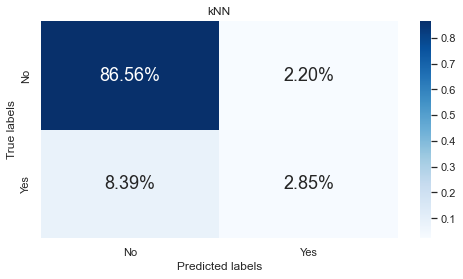

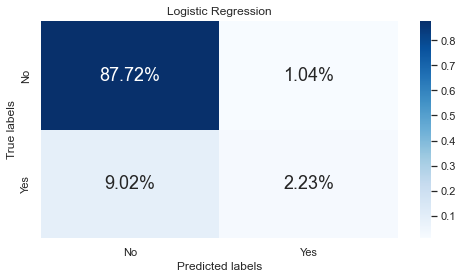

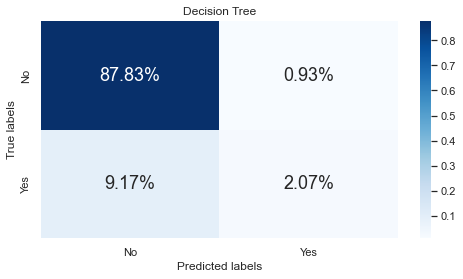

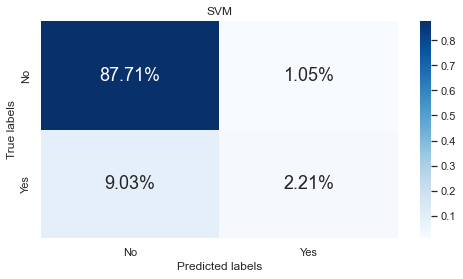

<Figure size 576x288 with 0 Axes>

In [93]:
#Display confusion

predictedList = [y_predicted_knn, y_predicted_lgr, y_predicted_dTree, y_predicted_svn]
listModels = ['kNN','Logistic Regression','Decision Tree','SVM']

#fix, ax = plt.subplots(2,2, figsize = (18,18))
plt.rcParams.update({'font.size': 18})

predictedList = [y_predicted_knn, y_predicted_lgr, y_predicted_dTree, y_predicted_svn]

for i,j in enumerate(predictedList):
   
    ax = plt.axes()
    ax.set_title('lalala')
    
    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, j)

    # Visualization of Confusion matrix
    pl.title('Confusion matrix of the classifier')
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues',ax=ax)
    ax.set_title(listModels[i])
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    
    ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);
    
    ConfusionMatrixDisplay(cm, display_labels = ['No','Yes'])

    plt.show()
plt.savefig("./ConfusionMatrixDefault.jpg");

###### 11.6 Confusion Matrix: Complex model with data balaced using Random Under Sampling (RUS)

In [94]:
y_predicted_knn = model_comparisions_rus_df.index[0].predict(X_test_rus)
#KNeighborsClassifier(n_neighbors=11, p=1)
y_predicted_lgr = model_comparisions_rus_df.index[1].predict(X_test_rus)
#LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
y_predicted_dTree = model_comparisions_rus_df.index[2].predict(X_test_rus)
#DecisionTreeClassifier(max_depth=3)
y_predicted_svn = model_comparisions_rus_df.index[3].predict(X_test_rus)
#SVC(probability=True)

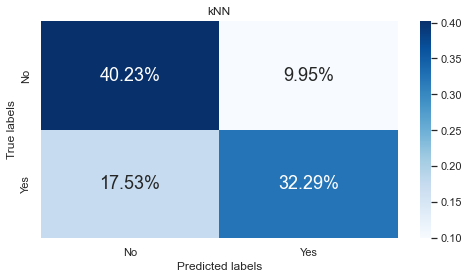

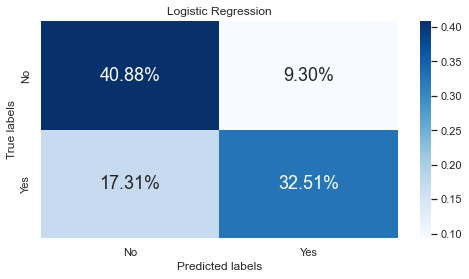

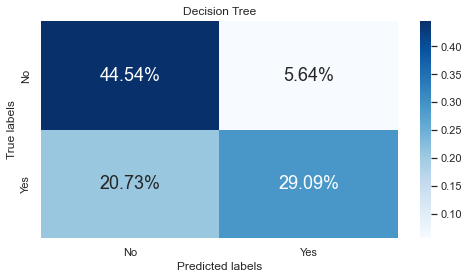

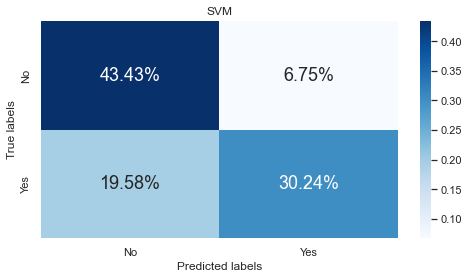

<Figure size 576x288 with 0 Axes>

In [95]:
predictedList = [y_predicted_knn, y_predicted_lgr, y_predicted_dTree, y_predicted_svn]
listModels = ['kNN','Logistic Regression','Decision Tree','SVM']

#fix, ax = plt.subplots(2,2, figsize = (18,18))
plt.rcParams.update({'font.size': 18})

predictedList = [y_predicted_knn, y_predicted_lgr, y_predicted_dTree, y_predicted_svn]

for i,j in enumerate(predictedList):
   
    ax = plt.axes()
    
    
    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test_rus, j)

    # Visualization of Confusion matrix
    pl.title('Confusion matrix of the classifier')
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues',ax=ax)
    ax.set_title(listModels[i])
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    
    ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);
    
    ConfusionMatrixDisplay(cm, display_labels = ['No','Yes'])

    plt.show()
plt.savefig("./ConfusionMatrixRUS.jpg");

###### 11.7 Confusion Matrix: Complex models with data balaced with Random Over Sampling (ROS)

In [120]:
y_predicted_knn = model_comparisions_ros_df.index[0].predict(X_test_ros)#KNeighborsClassifier(n_neighbors=11, p=1)
y_predicted_lgr = model_comparisions_ros_df.index[1].predict(X_test_ros)#LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
y_predicted_dTree = model_comparisions_ros_df.index[2].predict(X_test_ros)#DecisionTreeClassifier(max_depth=3)
y_predicted_svn = model_comparisions_ros_df.index[3].predict(X_test_ros)#SVC(probability=True)

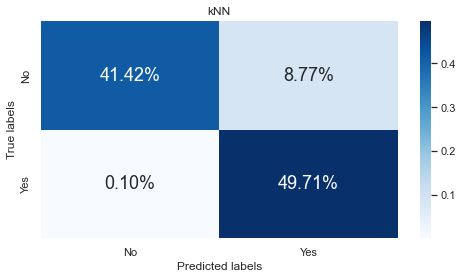

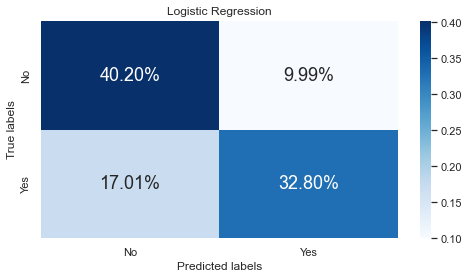

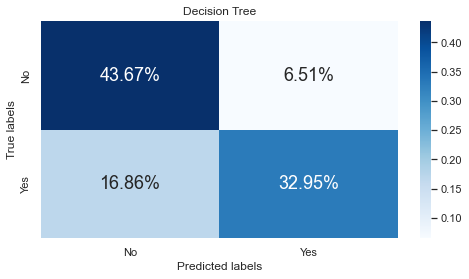

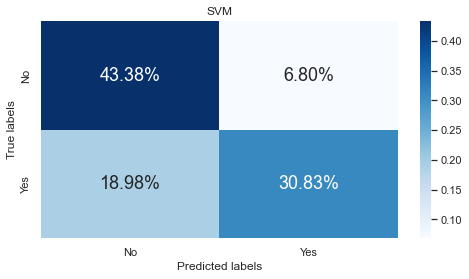

<Figure size 576x288 with 0 Axes>

In [121]:
predictedList = [y_predicted_knn, y_predicted_lgr, y_predicted_dTree, y_predicted_svn]
listModels = ['kNN','Logistic Regression','Decision Tree','SVM']

#fix, ax = plt.subplots(2,2, figsize = (18,18))
plt.rcParams.update({'font.size': 18})

predictedList = [y_predicted_knn, y_predicted_lgr, y_predicted_dTree, y_predicted_svn]

for i,j in enumerate(predictedList):
   
    ax = plt.axes()
    
    
    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test_ros, j)

    # Visualization of Confusion matrix
    pl.title('Confusion matrix of the classifier')
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues',ax=ax)
    ax.set_title(listModels[i])
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    
    ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);
    
    ConfusionMatrixDisplay(cm, display_labels = ['No','Yes'])

    plt.show()
plt.savefig("./ConfusionMatrixRUS.jpg");

####  Feature importance.

In machine learning, feature importance is the measure of the relevance or usefulness of each input variable or feature in a predictive model. It indicates how much each feature contributes to the prediction made by the model. Determining feature importance is useful because it can help identify which features have the most impact on the model's performance, and which features can be excluded or added to improve the model's accuracy or efficiency.

The importance of a feature can be represented by a score or ranking, and the higher the score or rank, the more important the feature is considered to be.

In [98]:
# train a Random Forest classifier on the data

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# get feature importances from the trained model
importances = dt_model.feature_importances_

# create a dataframe to store the feature importances
feat_imp_df = pd.DataFrame({'Features': X.columns, 'Importance': importances})

# sort the features by importance score in descending order
feat_imp_df = feat_imp_df.sort_values('Importance', ascending=False)

# print the feature importance scores
print(feat_imp_df)

                Features  Importance
0                    age    0.172702
8            nr.employed    0.162459
7              euribor3m    0.109135
1               campaign    0.087303
21                   job    0.086235
23             education    0.078442
24           day_of_week    0.053839
22               marital    0.042633
2                  pdays    0.039256
6          cons.conf.idx    0.029960
14           housing_yes    0.020933
17              loan_yes    0.018433
12            housing_no    0.018010
15               loan_no    0.017416
5         cons.price.idx    0.012970
9             default_no    0.009005
25                 month    0.008404
3               previous    0.008323
10       default_unknown    0.006811
19  poutcome_nonexistent    0.004719
4           emp.var.rate    0.004222
13       housing_unknown    0.003434
18      poutcome_failure    0.002879
16          loan_unknown    0.001754
20      poutcome_success    0.000719
11           default_yes    0.000000


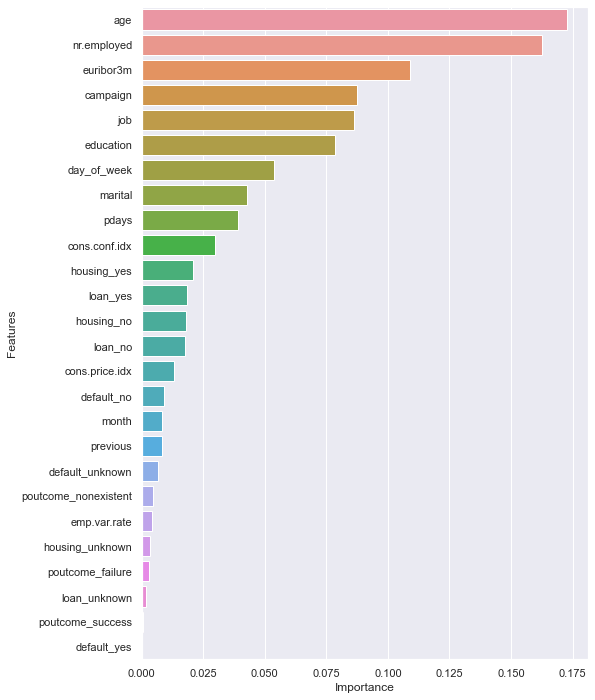

In [102]:
plt.figure(figsize=(8,12))
sns.barplot( data=feat_imp_df, x='Importance', y='Features' )

plt.savefig("./images/feature_importance.jpg");
plt.show()

**Findings**

- Principal Component Analysis (PCA) was used to decrease the number of features required to train classifiers. This was primarily achieved by reducing the number of non-essential features by approximately 17 (from 26 down to 17) while maintaining almost 100% cumulative variance.

- On a 16GB Core i7 machine, SVM is known for being computationally intensive and slow to process, which can be a challenge in most cases.

- Decision Tree Classifier used to estimate the feature Importance for the 26 features. We find that the feature importance is the highest for the age, number of years employed, euribor 3 month rate ... etc (figure shown above).

- We used the GridsearchCV for the best hyperparameters and performance optimization.

- Out of all the classifiers used, the Decision Tree Classifier exhibited the best f1-score performance, and fit time. 


Questions